# Iniciando em *Machine Learning* com a Competição do Titanic


---

Para aqueles que embarcam no estudo da Data Science uma hora vai dar de cara com o desafio do Titanic. Sem dúvidas é um dos mais populares e conhecidos para aqueles que estão iniciando nesta área desafiadora, sendo considerado o "Hello World" em análise de dados.

O mesmo se encontra disponível no [kaggle.com](https://www.kaggle.com/c/titanic).

Tamanha popularidade está relacionada com trágica história que a maioria das pessoas já conhecem. Retratado em filmes e documentários, a história da maior obra-prima da indústria naval da época, o que era considerado o maior e mais moderno já construído, teve um triste fim em 15 de abril de 1912, que levou a morte de 1502  dos 2224 tripulantes após colidir com um iceberg.


<img src="https://i.imgur.com/pRcnT1M.jpg[/img" width=600>

O objetivo do desafio é utilizar os dados **reais** e analisar, testar hipóteses e aplicar modelos de *Machine Learnig* para entender as chances de sobrevivência dos passageiros do navio.

Afinal, muitas dúvidas quanto aos fatores que definiram aqueles que entravam nos botes salva-vidas (já que não tinha o suficiente para todos os passageiros), será que a classe influenciou? será que todos indenpendentes do sexo e idade tiveram as mesmas chances?


## Entendendo o Problema

Pensar em um navio com as características nas quais o Titanic foi contruído, fica fácil entender o porquê da famosa frase "Nem Deus pode afundar este Navio". No entanto, o resultado final foi no mínimo trágico.

O naufrágio teve como fatores naturais e humanos, associados como determinantes para o cenário final, que levou à morte de muitas pessoas.


### Objetivo

Analisar e entender se todos tiveram o mesmo fator de "sorte" para sobreviver ao naufrágio através dos dados daqueles que sobreviveram. 

Após a análise dos dados, construiremos um modelo de Machine Learning para prever sobreviventes no Titanic com base em dados de outros passageiros.

A descrição completa encontra-se na página do desafio do kaggle [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic).

### Entendendo o Dataset


Para obter os dados basta acessar a opção de [*Data* do desafio no kaggle](https://www.kaggle.com/c/titanic/data).

Os dados foram divididos em dois grupos:

* conjunto de treinamento (train.csv)
* conjunto de teste (test.csv)

O conjunto de treinamento deve ser usado para criar seus modelos de aprendizado de Machine Learning. Nele contém a variável ``Survived`` que possui a informação daqueles que sobreviveram ou não.

O conjunto de teste deve ser usado para ver o desempenho do seu modelo em dados não vistos. Para este conjunto não foi fornecido a verdade básica para cada passageiro. É nosso trabalho prever esses resultados. Para cada passageiro no conjunto de testes, usaremos o modelo treinado para prever se eles sobreviveram ou não ao naufrágio do Titanic.


In [1]:
# Importar as bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para os gráficos serem renderizados no próprio Jupyter
%matplotlib inline

In [2]:
# Carregando os dois DataSets que serão utilizados

df_train = pd.read_csv('Dados/train.csv')
df_test = pd.read_csv('Dados/test.csv')

## Exploração e Análise dos Dados (EDA)

A análise exploratória dos dados é o primeiro passo a ser executado, conhecer os dados é importante para nos ajudar a conhecer os tipos das variáveis, responder e formular perguntas sobre os dados.

Na imagem abaixo podemos ver o dicionário dos dados retirados do kaggle.

<img src="https://i.imgur.com/sSvByWe.png[/img]" width=700>

Conforme observado na imagem a variável que queremos prever (*target*) estar na coluna ```Suvived```.


In [3]:
""" Criando um DataFrame para entender os tipos de dados 
    e os valores missing no Dataset train"""

df_aux_train = pd.DataFrame({'Colunas': df_train.columns,
                       'Tipos': df_train.dtypes,
                       'Percentual_faltantes': df_train.isna().sum() / df_train.shape[0]})
df_aux_train

,Colunas,Tipos,Percentual_faltantes
PassengerId,PassengerId,int64,0.000000
Survived,Survived,int64,0.000000
Pclass,Pclass,int64,0.000000
Name,Name,object,0.000000
Sex,Sex,object,0.000000
Age,Age,float64,0.198653
SibSp,SibSp,int64,0.000000
Parch,Parch,int64,0.000000
Ticket,Ticket,object,0.000000
Fare,Fare,float64,0.000000


Como podemos verificar as colunas **Age, cabin e Embarked** possuem dados nulos no Dataset train.

In [4]:
""" Criando um DataFrame para entender os tipos de dados 
    e os valores missing no Dataset train"""

df_aux_test = pd.DataFrame({'colunas': df_test.columns,
                            'tipos': df_test.dtypes,
                            'Percentual_faltantes': df_test.isna().sum() / df_test.shape[0]})
df_aux_test

,colunas,tipos,Percentual_faltantes
PassengerId,PassengerId,int64,0.000000
Pclass,Pclass,int64,0.000000
Name,Name,object,0.000000
Sex,Sex,object,0.000000
Age,Age,float64,0.205742
SibSp,SibSp,int64,0.000000
Parch,Parch,int64,0.000000
Ticket,Ticket,object,0.000000
Fare,Fare,float64,0.002392
Cabin,Cabin,object,0.782297


Como podemos verificar assim como Dataset train as colunas **Age, cabin e Embarked** possuem dados nulos no Dataset test em proporções parecidas. Atentando que as colunas **Cabin e Age** possuem a maior quantidade desses dados faltantes.

In [5]:
# Descrevendo as 5 primeiras linhas dos dados

df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Veerificando as principais distribuições estatísticas

df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


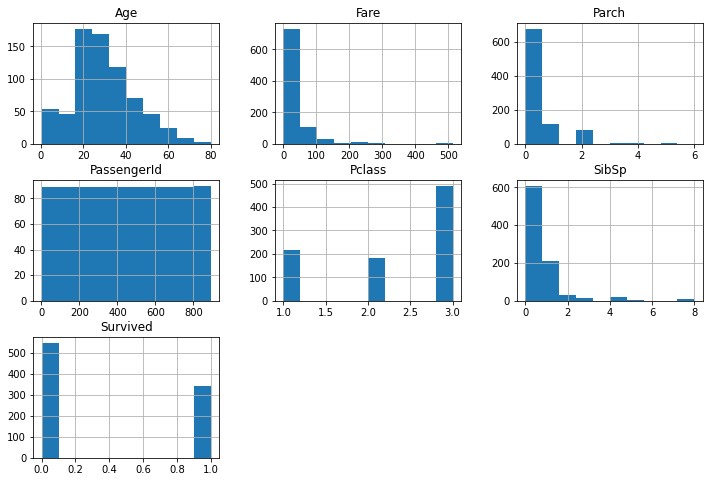

In [7]:
# Podemos ver um histograma das variáveis númericas

df_train.hist(figsize=(12,8));

In [8]:
# Verificar quais grupos entre a coluna 'Sex' mais tiveram sobreviventes

female = df_train[df_train['Sex'] == 'female']['Survived']
rate_fem = sum(female)/len(female)
print('% das mulheres das sobreviveram: {}'.format(rate_fem))

male = df_train[df_train['Sex'] == 'male']['Survived']
rate_male = sum(male)/len(male)
print('% dos homens que sobreviveram: {}'.format(rate_male))


% das mulheres das sobreviveram: 0.7420382165605095
% dos homens que sobreviveram: 0.18890814558058924


Como vemos acima, sobreviveu percentualmente muito mais mulheres que homens. Isto no mostra que a variável **Sex** é uma variável importante a se usar no nosso modelo.

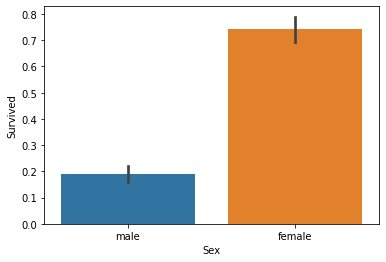

In [9]:
# verificar a distribuição de Suvived x Sex

sns.barplot(x='Sex', y='Survived', data=df_train);

Como já haviámos visto anteriormente, as mulheres tiveram maior probabilidade de sobrevivência.

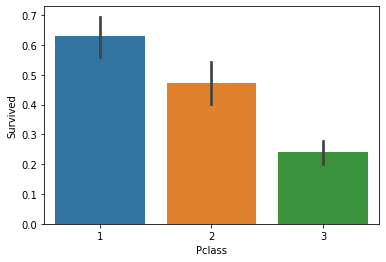

In [10]:
# verificar a distribuição de Suvived x Pclass

sns.barplot(x='Pclass', y='Survived', data=df_train);

Como já imaginávamos, a classe também foi um fator que contribuiu entre aqueles que sobreviveram.

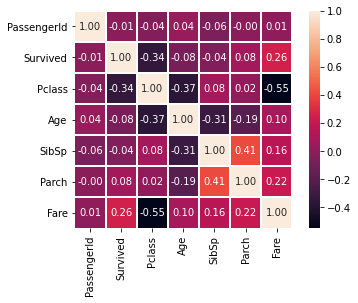

In [11]:
# Plotar o gráfico de heatmap para verificarmos as relações entre as variáveis

sns.heatmap(df_train.corr(), square = True, linewidths= .5, annot=True, fmt='.2f');

### Pandas Profiling

O Pandas.Profiling é uma biblioteca que auxilia na elaboração de um análise exploratória sem passar manualmente pelos passos que fizemos acima.

Sem sombras de dúvidas está é uma das ferramentas que você deve conhecer

Para fazer a instalação podes usar o comando: pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [12]:
# import do ProfileReport

from pandas_profiling import ProfileReport

In [13]:
# executando o profile

profile = ProfileReport(df_train, title='Relatório - Pandas Profiling', html={'style':{'full_width':True}})
profile

Caso queira salvar o arquivo do relatório do profiling basta usar o seguinte comando "profile.to_file(output_file="exemplo.html")", o arquivo gerado poderá ser analisado em qualquer browser.

#### Observações

* Podemos verificar que as variáveis ```PassengerId``` e ```Name``` posuem apenas valores únicos.
* Na variável ```Age``` podemos observar que a distribuição de sobreviventes é maior entre os mais jovens.

## Modelando os Dados

Até o momento, fizemos a importação dos dados, entedemos e vizualizamos por meio de gráficos; realizamos a análise exploratória e elencamos as variáveis que verificamos correlações mais fortes.


### Selecionando as Variáveis

Como observamos acima o Dataset do Titanic possui algumas variáveis que não usaremos na construção do nosso modelo a seguir, pois, não possuem influência significativa na relação da causalidade final (conforme nosso julgamento).

Nosso foco aqui também é refletir e tomar decisão sobre os recursos, isso nos será cobrado inúmeras vezes na vida real, e caso haja algum equívoco ou o modelo futuro não atinja um bom resultado, essas *features* podem ser alteradas e trabalhadas.

Neste caso, não vamos usar as seguintes variáveis ['PassengerId', 'Name', 'Ticket', 'Cabin']. Você Poderia trabalhar com a coluna ```Name``` e categorizar cada título de cada passageiro, como o objetivo é elucidar o início em *Machine Learning* não faremos neste notebook.


In [14]:
# Guardando a variável 'PassengerId' (esqueci na primeira vez rsrs)

passengerId = df_test['PassengerId']

In [15]:
# Dropando as variáveis dos dois Datasets

df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

**Nota**: É possível trabalhar juntando os dois Datasets para realizar as mesmas manipulações em ambos ao mesmo tempo. No entanto, resolvi trabalhar com os dois separados para melhor entendimento de todos.

### Tratando os *Missing Values*

Como vimos acima algumas de nossas *features* possuem dados faltantes (que bom), acredito que isso vai ser uma coisa comum nas minhas atividades futuras, afinal, não existe base de dados perfeita e completa.

Caso essa fosse outra situação, poderíamos sentar e conversar com os donos dos dados para entender melhor o porquê, mas devido esta impossibilidade, faremos o seguinte:

* Preencher os campos faltantes com a média, ou mediana dos valores.
* Ou excluir a linha dos dados.

Entendo que esta parte depende muito de cada Cientista de Dados, afinal cada um usará suas ferramentas para trabalhar os Datasets.



In [16]:
"""Verificando a quantidade de dados nulos em cada feature
do Dataset df_train"""

df_train.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [17]:
"""Verificando a quantidade de dados nulos em cada feature
do Dataset df_test"""

df_test.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

Para os nossos dois Dataset, apenas a variável ```Age``` possue a maior quantidade de *missing values* e neste caso iremos preencher com o valor da mediana de cada Dataset. Assim, como na variável ```Fare```.

Já para ```Embarked``` vamos fazer o drop das linhas. Lembrando, que tomei a decisão de fazer isto devido a quantidade pequena que este de dados faltantes dessa *feature*, caso não queira realizar a exclusão podes preencher com o valor mais frequente.


In [18]:
# 'Age'

df_train['Age'].fillna(df_train['Age'].median(), inplace=True)
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)

In [19]:
# 'Fare'

df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)

In [20]:
# 'Embarked'

df_train.dropna(axis=0, inplace=True)

Agora que tratamos os *Missing Values* temos que guardar a variável target e fazer o drop antes de prosseguir para próxima etapa.

In [21]:
# Guardando a variável 'Suvived'

target = df_train['Survived']

# Tirando a variável do Datafram Train

df_train.drop(['Survived'], axis=1, inplace=True)

In [22]:
# Verificando se os Datasets possuem as mesmas features

df_train.columns == df_test.columns

array([ True,  True,  True,  True,  True,  True,  True])

### Modelando as Variáveis

Para construirmos nosso modelo todas as nossas variáveis tem que possuir valores numéricos (para esse modelo).

No entanto as variáveis ```Sex``` e ```Embarked``` não possuem valores numéricos. Existe várias maneiras de mudar os valores. No nosso caso vou usar o *LabelEncoder* do *sklearn* para fazer a mudança de forma simples.

In [23]:
# Importanto o LabelEncoder do Sklearn

from sklearn.preprocessing import LabelEncoder

In [24]:
# Utilizando o LabelEncoder

# Dataset train

df_train['Sex'] = df_train[['Sex']].apply(LabelEncoder().fit_transform)
df_train['Embarked'] = df_train[['Embarked']].apply(LabelEncoder().fit_transform)

# Dataset test

df_test['Sex'] = df_test[['Sex']].apply(LabelEncoder().fit_transform)
df_test['Embarked'] = df_test[['Embarked']].apply(LabelEncoder().fit_transform)

In [25]:
# Após fazer as mudanças no Dataset Train

df_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [26]:
# Após fazer as mudanças no Dataset Test

df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


## Criando o Modelo

Ufa! depois do que passamos chegamos a parte mais rápida.

Como perceberemos ao logo de nossa jornada como Cientista de Dados, gastaremos boa parte do nosso tempo em análises, explorações e modificações de Dados, quanto melhor formos nessas etapas, mais assertivos serão nossos modelos (pelo menos é o que esperamos).

Nas próximas etapas criaremos dois modelos de *Machine Learnig*.

* Regressão Logística
* Floresta Randômica

### Regressão Logística

De acordo com o [Wikipédia](https://en.wikipedia.org/wiki/Logistic_regression), a regressão logística é uma técnica estatística que tem como objetivo produzir, a partir de um conjunto de observações, um modelo que permita a predição de valores tomados por uma variável categórica, frequentemente binária, a partir de uma série de variáveis explicativas contínuas e/ou binárias.

In [27]:
# Importando a biblioteca do Modelo de Machine Learning

from sklearn.linear_model import LogisticRegression

In [28]:
# Criando o Modelo de Rl

lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(df_train, target)

LogisticRegression(solver='liblinear')

In [29]:
# Verificar a acurácia

ac_lr = round(lr_model.score(df_train, target) * 100, 2)
print("Acurácia do Modelo de Regression Logistic: {}". format(ac_lr))

Acurácia do Modelo de Regression Logistic: 80.31


Como podemos ver acima, já conseguimos uma acurácia pouco superior à 80%, um bom número.

Podemos agora gerar o arquivo e submeter no site do kaggle.

In [30]:
# Criando o modelo de predição e gerando o arquivo para submissão

y_pred_lr = lr_model.predict(df_test)

submission = pd.DataFrame({"PassengerId": passengerId,
                           "Survived": y_pred_lr})

# Gerando o arquivo

submission.to_csv('submission_lr.csv', index=False)

Abaixo temos a imagem como *score* do nosso Modelo, neste caso em torno dos 76%.

<img src="https://i.imgur.com/CYudpCQ.png[/img]" width=100%>


### Random Forest Classifier

De acordo com  o [Wikipédia](https://en.wikipedia.org/wiki/Random_forest), florestas aleatórias ou florestas de decisão aleatória são um método de aprendizado conjunto para classificação, regressão e outras tarefas que operam construindo várias árvores de decisão no momento do treinamento e gerando a classe que é o modo das classes (classificação) ou previsão média (regressão) das árvores individuais. 


In [31]:
# Importando a biblioteca do Modelo de Machine Learning

from sklearn.ensemble import RandomForestClassifier

In [32]:
# Criando o Modelo de RF

rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
rf_model.fit(df_train, target)

RandomForestClassifier(max_depth=5, random_state=1)

In [33]:
# Verificar a acurácia

ac_rf = round(rf_model.score(df_train, target) * 100, 2)
print("Acurácia do Modelo de RandomForestClassifier: {}". format(ac_rf))

Acurácia do Modelo de RandomForestClassifier: 85.15


Como podemos ver, o Modelo de RF teve uma acurácia muito mais alta que o Modelo de RL, em torno de 85%.

Podemos agora gerar o arquivo e submeter no site do kaggle novamente.

In [34]:
# Criando o modelo de predição e gerando o arquivo para submissão

y_pred_rf = rf_model.predict(df_test)

submission = pd.DataFrame({"PassengerId": passengerId,
                           "Survived": y_pred_rf})

# Gerando o arquivo

submission.to_csv('submission_rf.csv', index=False)

Abaixo temos a imagem como score do nosso Modelo, neste caso também em torno dos 76%.
<img src="https://i.imgur.com/XEcArgr.png[/img]" width=100%>

Fica agora a pergunta, como trabalhar para que meus dados produzam um modelo com melhor acurácia?

Não alteramos muitos parâmetros, nem trabalhamos técnicas de engenharia de recursos, mas caso queiram, aconselho grandemente ler o material ofical das bibliotecas.

## Sugestão de Deployer


Essa é uma das grandes dúvidas daqueles que estão iniciando no estudo de Data Science.

Podemos ter como resultado da aplicação da Data Science, desde relatórios de análises à API's de aplicação com o modelo treinado.

No nosso caso mostraremos como uma simples aplicação a partir do nosso modelo para poder prever se alguém que preencha as informações consiga saber se ele teria a "sorte" de sobreviver ao naufrágio.

Na imagem abaixo, contém o exemplo extremamente simples de um *deployer* usando a biblioteca do Streamlit, vale a pena dar uma conferida, sem sombra de dúvidas irá gerá grande conhecimento, caso queira acessar o código o mesmo se encontra no meu [GitHub](.



<img src="https://i.imgur.com/psCxj2X.png[/img]" width=100%>



Neste App apliquei o modelo de floresta randômica e como podemos ver, no modelo predito eu não sobreviveria ao Naufrágio!

## Conclusões

Você entendeu tudo que fizemos juntos?

Espero que isso possa ajudar tanto quanto ajudou à mim. Este é apenas meu primeiro Jupyter que parei realmente para escrever e **sinceramente** muitos outros virão nos próximos dias.

No próximo notebook trabalharemos apenas com engenharia de recursos e aperfeiçoaremos nosso modelo.

Caso você queira ler o artigo desse livro pode acessar meu blog no [Medium](https://medium.com/@jair.oliveira1204) e também podem me adicionar no [Likedin](https://www.linkedin.com/in/jairjloliveira/).